# Basic theory on ODE solvers

# Learning Objectives

At the end of this lecture you will be able to:
1. Define a simple solver to approximate solutions of ODEs based on Taylor Series
2. Quantify the numerical error of an approximated solution

# Introduction

Let's assume that we want to find an analytical expression of a function that describes the displacement an object in time, denoted as $ u(t) $. For simplicity, we assume that this object only has one degree of freedom (DOF), *e.g.* the vertical displacement of the centre of gravity of a floating vessel. We also assume that the object satisfies the equation of motion given by a linear mass-damping-stiffness system:

$$ m\ddot{u}(t)+c\dot{u}(t)+ku(t)=F(t), $$

with $m$ the mass of the object, $c$ the damping and $k$ the stiffness. $ F(t) $ is a time-dependent forcing term. We also provide appropriate initial conditions, in that case 
$$ u(0)=0,\quad\dot{u}(0)=\dot{u}_0. $$

In General, and mostly depending on the complexity of the forcing term $ F(t) $, it is difficult to find an analytical expression that is defined at all times, $u(t)\, ∀ t\in[0,\infty)$, see red curve in the following figure.

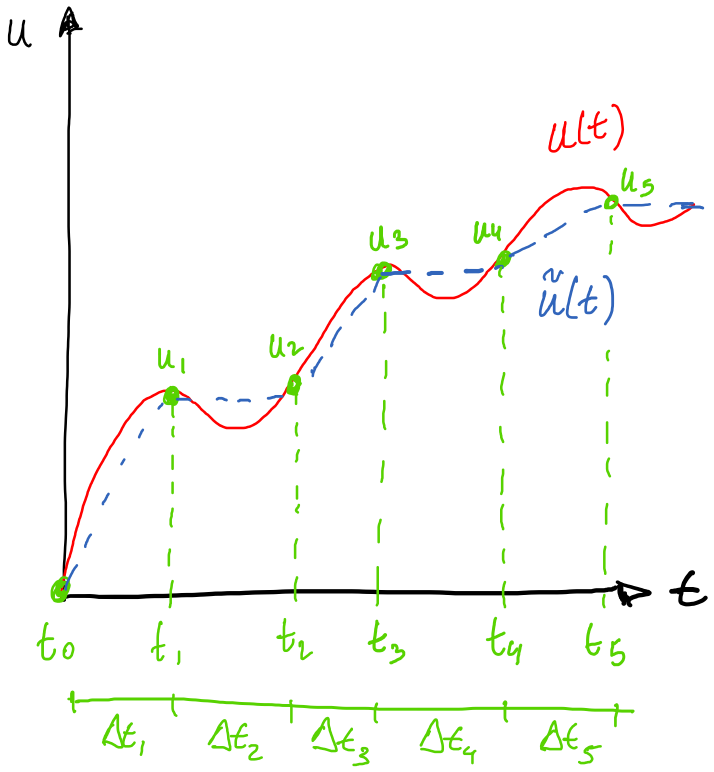

Instead, we might be interested in knowing the value of the function at specific points in time, $u(t_0),u(t_1),u(t_2),...,u(t_N)$, see green dots in the previous figure. From these set of values, one can reconstruct an approximated function $\tilde{u}_N(t)$ by, for instance, using a linear interpolation between points (blue dashed line in the figure).

For smooth enough functions, $u(t)$, as we increase the number of evaluation points in time, $N$, the approximated solution solution $\tilde{u}_N(t)$ will be closer to $u(t)$.

> **Important!**
>
> In this course we will learn how to find approximate solutions like $\tilde{u}_N(t)$ by using numerical methods. 

## Notation
In these notes we will use the following notation: 
* $u_i:=u(t_i)$, the function evaluated at time $t_i$. 
* $\Delta t_i:=t_i-t_{i-1}$, the time step between two consecutive time steps, $t_{i-1}$ and $t_i$.
When considering constant time steps, in an interval of time $t\in[0,T]$ with $N$ time steps, the time step size will be $\Delta t=T/N$.

# Taylor Series

Before going into more details on how to find a numerical approximation, let's start by refreshing some theory about **[Taylor series](https://en.wikipedia.org/wiki/Taylor_series)**. As one can find in the Wikipedia page:

> the **Taylor series** of a function is an infinite sum of terms that are expressed in terms of the function's derivatives at a single point.

That is $$f(x)=\sum_{i=0}^\infty\frac{f^{(i)}(a)}{i!}(x-a)^i.$$

The series is exact for an arbitrary function as long as we include infinite terms in the sum. However, here we are interested on an approximation that includes only the first $r$ terms of the expansion: $$ f_r(x)=\sum_{i=0}^r\frac{f^{(i)}(a)}{i!}(x-a)^i\approx f(x). $$

Let's see how this work in a practical example. We consider here the function $f(x)=\sin(x)$ and we want to approximate this function knowing the function value and its derivatives at the point $a=0$. Using five terms in the expansion, $r=5$, we have that 
$$\begin{align*}f_5(x) &= \sin(0) + x\cos(0) - \frac{x^2}{2}\sin(0) - \frac{x^3}{6}\cos(0) + \frac{x^4}{24}\sin(0) + \frac{x^5}{120}\cos(0)\\
                      &= x - \frac{x^3}{6} + \frac{x^5}{120}.
\end{align*} $$

We now can do a first coding exercise with this example and see how this approximation looks like for different values of $r$. To do so, we explicitly define the approximated functions.

Lets first import some useful packages:

In [32]:
import math
from matplotlib import pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'matplotlib'

We define a set of functions $f_r(x)$ with $r$ the number of terms in the Taylor expansion.

In [21]:
a=0.0
def f(x):
    return math.sin(x)
def f0(x):
    return math.sin(a)
def f1(x):
    return f0(x) + (x-a)*math.cos(a)
def f2(x):
    return f1(x) - ((x-a)**2)/2*math.sin(a)
def f3(x):
    return f2(x) - ((x-a)**3)/6*math.cos(a)
def f4(x):
    return f3(x) + ((x-a)**4)/24*math.sin(a)
def f5(x):
    return f4(x) + ((x-a)**5)/120*math.cos(a)

Let's do a sanity check:

In [22]:
f5(0.1) == 0.1 - (0.1**3)/6 + (0.1**5)/120

True

And we plot them. Here we use the package [matplotlib](https://matplotlib.org/stable/index.html).

In [26]:
x = np.linspace(-2*math.pi,2*math.pi,100)

NameError: name 'np' is not defined

In [ ]:
plt = plot(x,f.(x),
           linecolor=:black,
           linewidth=3,
           label=L"\sin(x)",
           xlabel=L"x",
           ylabel=L"f(x)",
           xlim=[-2π,2π],
           ylim=[-1.5,1.5])
plot!(plt,x,f₀.(x),line=:dash,label=L"f_0(x)")
plot!(plt,x,f₁.(x),linewidth=2,line=:solid,label=L"f_1(x)")
plot!(plt,x,f₂.(x),line=:dash,label=L"f_2(x)")
plot!(plt,x,f₃.(x),linewidth=2,line=:solid,label=L"f_3(x)")
plot!(plt,x,f₄.(x),line=:dash,label=L"f_4(x)")
plot!(plt,x,f₅.(x),linewidth=2,line=:solid,label=L"f_5(x)")
savefig("./__site/assets/lecture_notes/Module1/TaylorSeries/figures/1_2.png") # hide
```
\fig{./figures/1_2.png}

We see that as we increase the number of terms, the approximation gets closer to the analytical expression. Note also that for this particular example, there is no gain for $r=2$ and $r=4$ with respect to $r=1$ and $r=3$. This is caused by the fact that $\sin(a)=0$ at the approximation point $a=0$.

We can go further and evaluate and plot the error of the approximation for different values of $m$.
$$ e_m(x)=|f(x)-f_m(x)|,\qquad r=1,...,5$$
```julia:./code/Taylor_series_error
e₀(x)=abs(f(x)-f₀(x))
e₁(x)=abs(f(x)-f₁(x))
e₂(x)=abs(f(x)-f₂(x))
e₃(x)=abs(f(x)-f₃(x))
e₄(x)=abs(f(x)-f₄(x))
e₅(x)=abs(f(x)-f₅(x))

plt = plot(x,log.(e₀.(x)),line=:dash,label=L"e_0(x)",xlabel=L"x",ylabel=L"\log(e(x))",)
plot!(plt,x,log.(e₁.(x)),linewidth=2,line=:solid,label=L"e_1(x)")
plot!(plt,x,log.(e₂.(x)),line=:dash,label=L"e_2(x)")
plot!(plt,x,log.(e₃.(x)),linewidth=2,line=:solid,label=L"e_3(x)")
plot!(plt,x,log.(e₄.(x)),line=:dash,label=L"e_4(x)")
plot!(plt,x,log.(e₅.(x)),linewidth=2,line=:solid,label=L"e_5(x)")
savefig("./__site/assets/lecture_notes/Module1/TaylorSeries/figures/1_3.png") # hide
```
\fig{./figures/1_3.png}

As it is seen in the previous figure, close to the evaluation point $a$, the approximation error decreases as we increase the number of terms in the expansion.

@@important 
@@important-title
*Now we know...*
@@
* How to approximate a function using a **Taylor series**
* That the approximation error is introduced when truncating the series to $r$ finite terms
* How to compute and plot the Taylor series approximation and error of a simple function
@@


# Additional material
In practise, one can use tools that facilitate the derivation of Taylor series of functions. That is the case of the package [`TaylorSeries.jl`](https://juliadiff.org/TaylorSeries.jl/stable/), a Julia package for Taylor expansions in one or more independent variables.

